# Definición de variables de entorno

- Frecuencia de portadora: $f_c = 1300~MHz$
- Frecuencia de muestreo: $f_s = 10~MHz$
- Frecuencia de repetición de pulsos: $PRF = 1500~Hz$
- Intervalo de repetición de pulsos $PRI = PRF^{-1}$
- 4 Targets
    - Rango del target
    - Velocidad del target
    - SNR del target

In [1]:
fc = 1300e6
fs = 10e6
PRF = 1500
PRI = PRF**(-1)
Rmax = 30e3
Rmin = 3e3

class Target:
  def __init__(self, targetRange, targetSNR, targetVelocity):
    self.range = targetRange
    self.SNR = targetSNR
    self.Velocity = targetVelocity

In [2]:
t1 = Target(targetRange = 5000,
            targetSNR = 7,
            targetVelocity = 43.2692
           )

t2 = Target(targetRange = 10000,
            targetSNR = 10,
            targetVelocity = 86.5385
           )

t3 = Target(targetRange = 20000,
            targetSNR = 30,
            targetVelocity = -20.7692
           )

t4 = Target(targetRange = 25000,
            targetSNR = 35,
            targetVelocity = 0
           )

targets = [t1,t2,t3,t4]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

radarRange = np.arange(Rmin,Rmax,1)

Gt_db = 40 #dB
Gt = 10**(Gt_db/10)
Pt = 1e6
A_ant = 5*2.75
Ae = A_ant*0.6

rcs = np.abs(np.random.normal(loc=10, scale = 10, size=len(radarRange)))
Pr = Pt*Gt*Ae*rcs/((4*np.pi**2)*(radarRange**4))

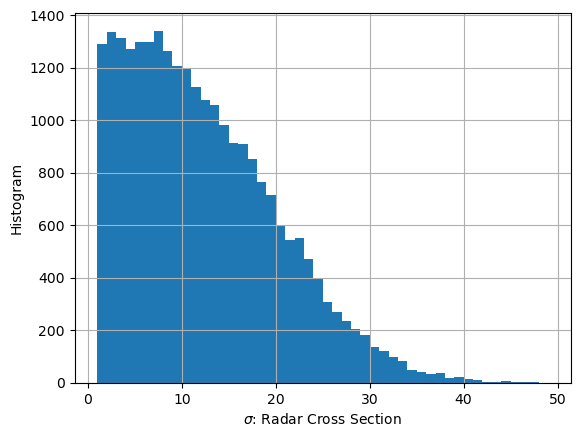

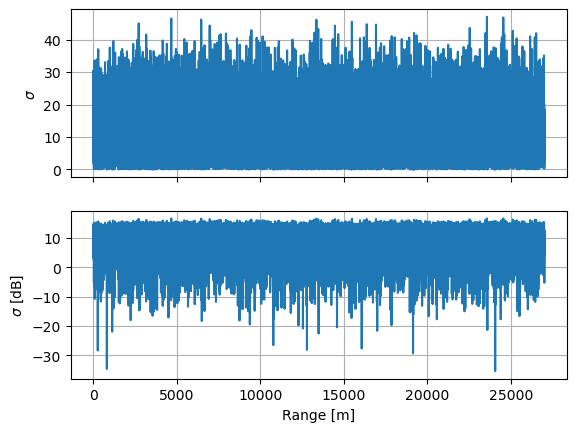

In [4]:
fig, ax = plt.subplots(1,1)
bins = np.arange(1,50,1)
ax.hist(rcs,bins)
ax.set_xlabel(r'$\sigma$: Radar Cross Section')
ax.set_ylabel('Histogram')
ax.grid(True)

fig, axes = plt.subplots(2,1,sharex=True)
ax = axes[0]
ax.plot(rcs)
ax.set_ylabel(r'$\sigma$')
ax.grid(True)

ax = axes[1]
ax.plot(10*np.log10(rcs))
ax.set_xlabel('Range [m]')
ax.set_ylabel(r'$\sigma$ [dB]')
ax.grid(True)



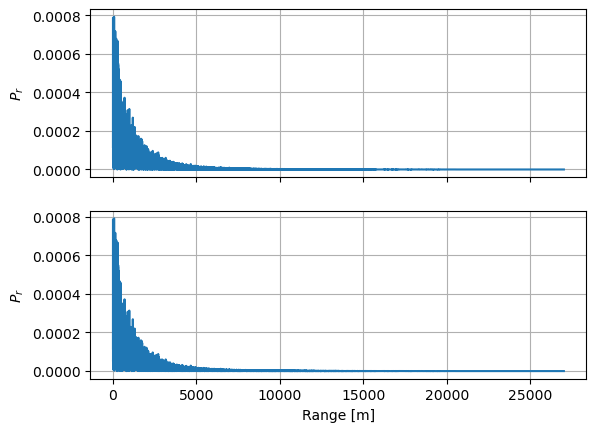

In [5]:
fig, axes = plt.subplots(2,1,sharex=True)

ax = axes[0]
ax.plot(Pr)
ax.set_ylabel(r'$P_r$')
ax.grid(True)

ax = axes[1]
ax.plot(10**np.log10(Pr))
ax.set_xlabel('Range [m]')
ax.set_ylabel(r'$P_r$')
ax.grid(True)
